In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleanned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [11]:
df.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


In [12]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [13]:
## Independant and dependant features
X= df.drop('FWI',axis=1)
y=df['FWI']

In [14]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [16]:
#train test spilt
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=45)

In [17]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [19]:
## Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.660795,-0.278939,-0.370676,0.686037,0.489583,0.377292,0.625153,0.461357,0.531519,0.303753
RH,-0.660795,1.000000,0.229917,0.232069,-0.650166,-0.410087,-0.228161,-0.705548,-0.354014,-0.437177,-0.427609
Ws,-0.278939,0.229917,1.000000,0.274892,-0.170338,-0.015730,0.080056,-0.015707,0.024178,-0.106463,-0.249133
Rain,-0.370676,0.232069,0.274892,1.000000,-0.549174,-0.277992,-0.289827,-0.339779,-0.289332,-0.364482,-0.087988
FFMC,0.686037,-0.650166,-0.170338,-0.549174,1.000000,0.591452,0.496276,0.746234,0.579781,0.768765,0.245305
DMC,0.489583,-0.410087,-0.015730,-0.277992,0.591452,1.000000,0.881988,0.671494,0.982540,0.560499,0.210788
DC,0.377292,-0.228161,0.080056,-0.289827,0.496276,0.881988,1.000000,0.494381,0.943979,0.485457,-0.051156
ISI,0.625153,-0.705548,-0.015707,-0.339779,0.746234,0.671494,0.494381,1.000000,0.633688,0.726887,0.295307
BUI,0.461357,-0.354014,0.024178,-0.289332,0.579781,0.982540,0.943979,0.633688,1.000000,0.562938,0.110407
Classes,0.531519,-0.437177,-0.106463,-0.364482,0.768765,0.560499,0.485457,0.726887,0.562938,1.000000,0.179664


<Axes: >

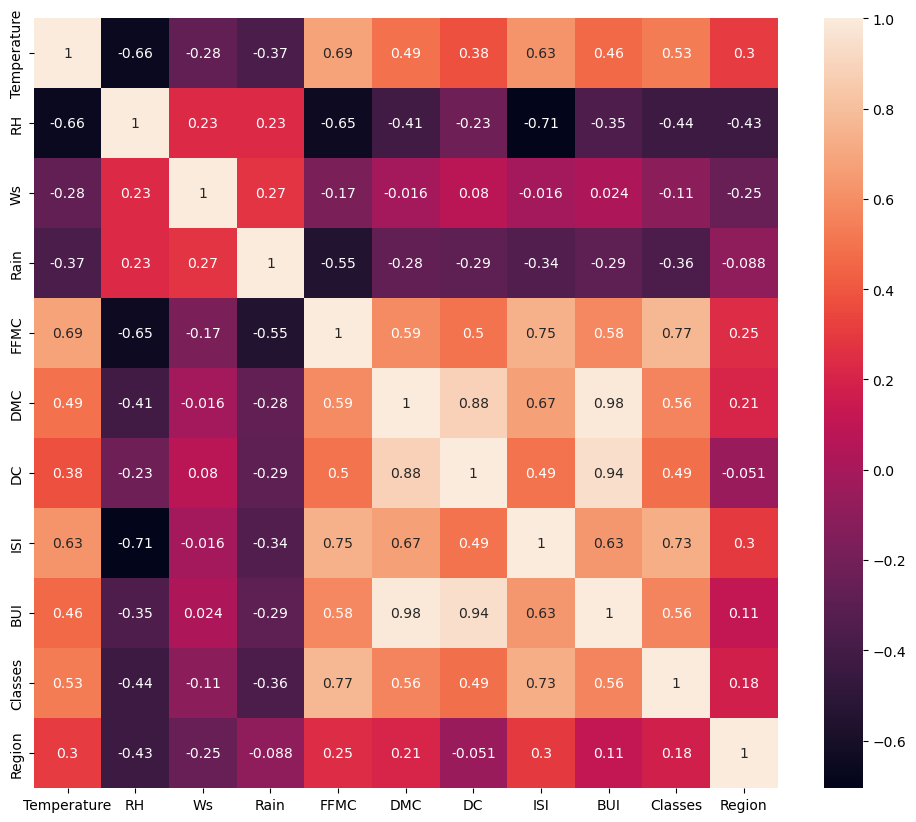

In [22]:
## check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [23]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [26]:
## threshold -- domain experise
corr_features = correlation(X_train,0.85)

In [27]:
## drop features when corr is more than 0.85

X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)

X_train.shape, X_test.shape

((182, 9), (61, 9))

### feature scaling or Standardization

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled

array([[ 1.03973391,  0.00396204,  0.21039187, ...,  0.54677005,
         0.85634884,  1.01105006],
       [-0.03239964, -0.97934302, -0.52597966, ..., -0.71718494,
        -1.16774842, -0.98907071],
       [-0.30043303, -0.45491366, -1.63053696, ...,  0.15786082,
         0.85634884, -0.98907071],
       ...,
       [-0.56846642, -1.37266504, -0.1577939 , ...,  0.88706562,
         0.85634884,  1.01105006],
       [ 1.57580069, -1.2415577 , -0.89416543, ..., -0.15812793,
         0.85634884,  1.01105006],
       [ 1.3077673 , -0.586021  , -0.52597966, ...,  0.78983831,
         0.85634884,  1.01105006]])

### boxplot to understand effect of standard scalar

Text(0.5, 1.0, 'X_train after scalling')

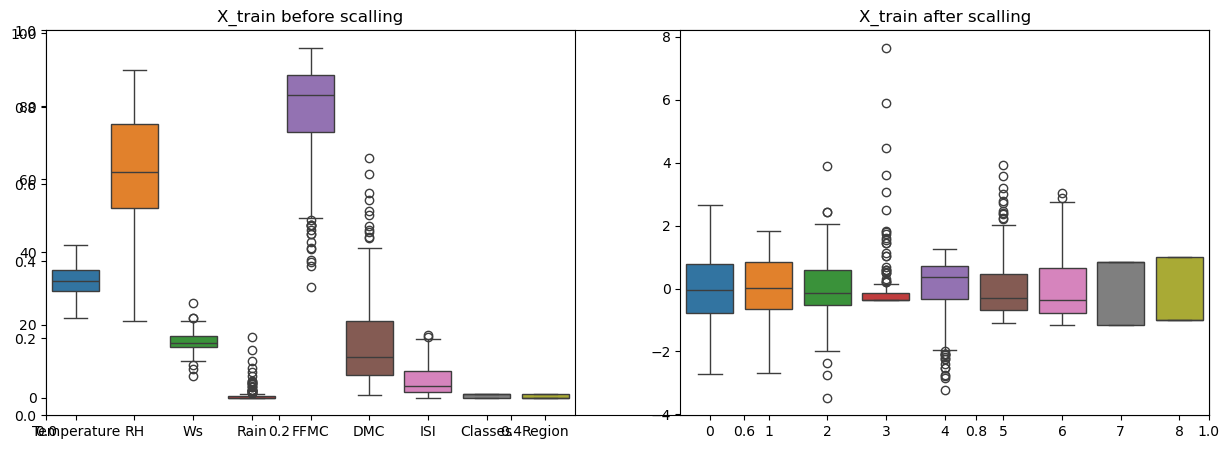

In [31]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scalling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scalling')


## Linear Regression Model

Mean absolute error 0.7713645614904533
R2 Score 0.90961932100668


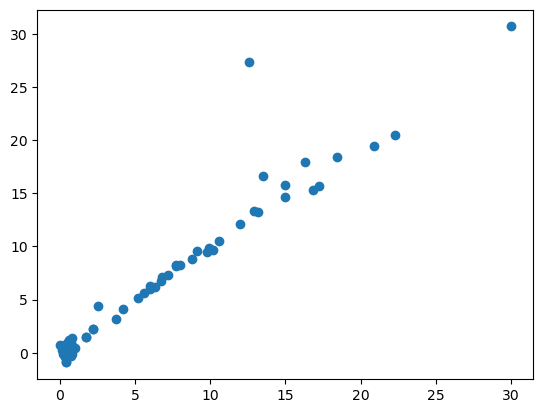

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score" , score)

plt.scatter(y_test,y_pred)

### lasso regression

Mean absolute error 1.1873366121992213
R2 Score 0.9153377261039456


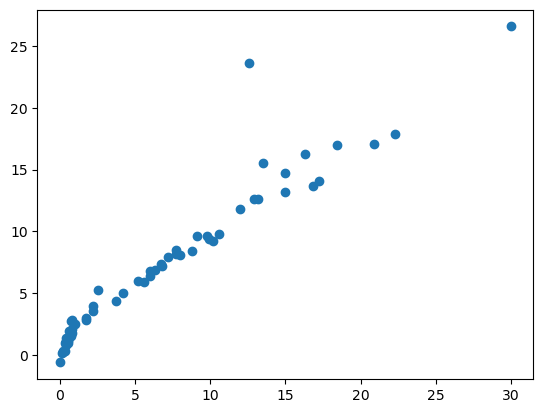

In [41]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score" , score)

plt.scatter(y_test,y_pred)

### Cross validation Lasso

ean absolute error 0.759329489305944
R2 score 0.9115326730057128


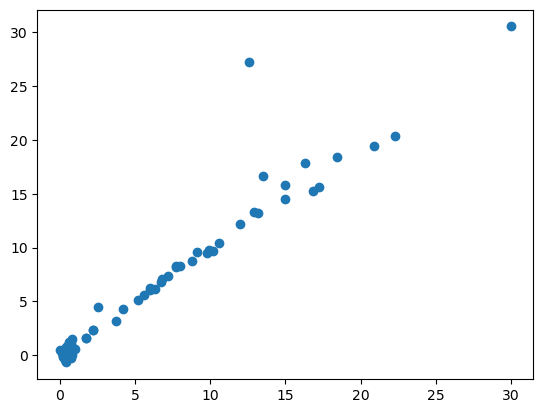

In [64]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score =r2_score(y_test,y_pred)

print("ean absolute error", mae)
print("R2 score", score)

In [50]:
lassocv.alpha_

0.018839552681517862

In [51]:
lassocv.alphas_

array([7.09297065, 6.61492817, 6.16910415, 5.75332717, 5.36557218,
       5.00395057, 4.66670105, 4.35218102, 4.05885858, 3.7853051 ,
       3.53018821, 3.29226534, 3.07037767, 2.86344449, 2.67045792,
       2.49047799, 2.32262811, 2.16609075, 2.02010348, 1.88395527,
       1.75698299, 1.63856822, 1.5281342 , 1.42514307, 1.3290932 ,
       1.23951676, 1.15597748, 1.07806847, 1.00541026, 0.93764898,
       0.87445457, 0.81551926, 0.76055599, 0.70929706, 0.66149282,
       0.61691041, 0.57533272, 0.53655722, 0.50039506, 0.46667011,
       0.4352181 , 0.40588586, 0.37853051, 0.35301882, 0.32922653,
       0.30703777, 0.28634445, 0.26704579, 0.2490478 , 0.23226281,
       0.21660907, 0.20201035, 0.18839553, 0.1756983 , 0.16385682,
       0.15281342, 0.14251431, 0.13290932, 0.12395168, 0.11559775,
       0.10780685, 0.10054103, 0.0937649 , 0.08744546, 0.08155193,
       0.0760556 , 0.07092971, 0.06614928, 0.06169104, 0.05753327,
       0.05365572, 0.05003951, 0.04666701, 0.04352181, 0.04058

In [52]:
lassocv.mse_path_

array([[68.94264817, 94.96565083, 47.19676599, 41.33277872, 31.84725423],
       [64.32256179, 94.96565083, 42.12761595, 35.76708914, 28.09323664],
       [57.88328842, 94.96565083, 37.70177774, 30.94896234, 24.79605915],
       [52.22327577, 87.44524513, 33.71269286, 26.77698902, 21.37061933],
       [47.24503184, 77.99616764, 29.57901888, 23.16577473, 18.41342565],
       [42.86349296, 69.77386744, 25.97676688, 20.04114237, 15.8617615 ],
       [37.80469833, 62.61882342, 22.83708624, 17.33855984, 13.66179498],
       [33.22014855, 55.24483812, 20.10017309, 15.00206878, 11.76623904],
       [29.22322453, 48.59878275, 17.713983  , 12.98308263, 10.13423992],
       [25.73767118, 42.79938551, 15.63298193, 11.23927025,  8.73034635],
       [22.69750407, 37.73716545, 13.81826431,  9.73400971,  7.52380027],
       [20.04529152, 33.31836388, 12.23524126,  8.43545984,  6.48792046],
       [17.73056993, 29.45975578, 10.85404918,  7.31597868,  5.59941737],
       [15.71083384, 26.08941028,  9.6

### Ridge Regression model

Mean absolute error 0.7619995110582065
R2 Score 0.9123601798432848


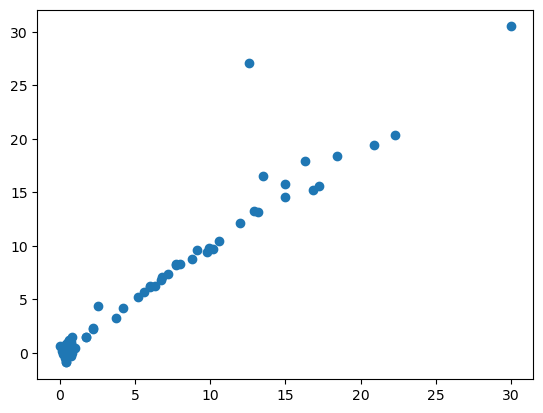

In [42]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score" , score)

plt.scatter(y_test,y_pred)

### Cross validation Ridge

ean absolute error 0.7619995110582065
R2 score 0.9123601798432848


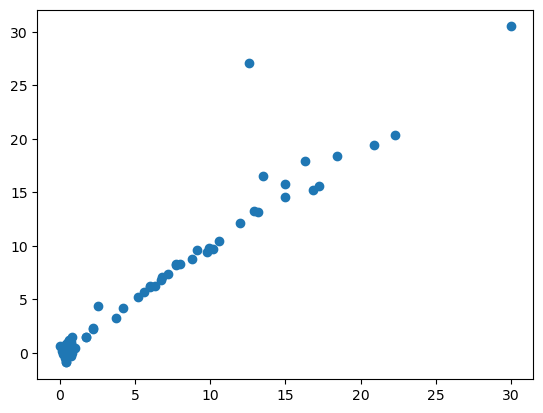

In [58]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred =ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score =r2_score(y_test,y_pred)
print("ean absolute error", mae)
print("R2 score", score)

In [59]:
ridgecv.alpha_

1.0

In [61]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [62]:
ridgecv.get_params

<bound method BaseEstimator.get_params of RidgeCV(cv=5)>

### Elasticnet Regression model

Mean absolute error 1.7157737929202213
R2 Score 0.8844387249095774


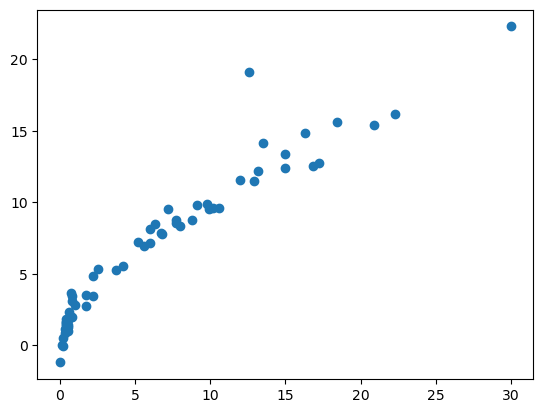

In [43]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elasticNet = ElasticNet()
elasticNet.fit(X_train_scaled,y_train)
y_pred = elasticNet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score" , score)

plt.scatter(y_test,y_pred)

### Cross Validation Elasticnet

ean absolute error 0.7555751191344473
R2 score 0.9135767207434917


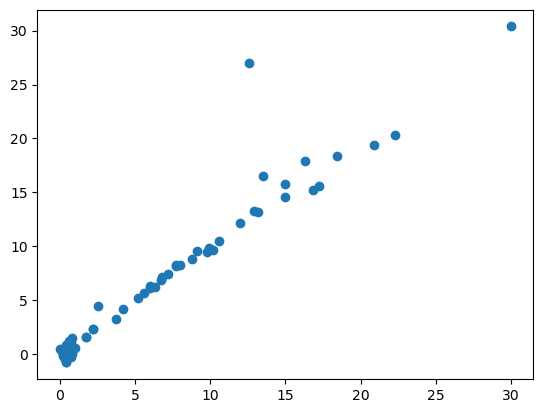

In [63]:
from sklearn.linear_model import ElasticNetCV
elasticNetCV = ElasticNetCV(cv=5)
elasticNetCV.fit(X_train_scaled,y_train)
y_pred =elasticNetCV.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score =r2_score(y_test,y_pred)
print("ean absolute error", mae)
print("R2 score", score)

In [65]:
elasticNetCV.alpha_

0.014185941294919933

In [68]:
elasticNetCV.alphas_

array([14.18594129, 13.22985633, 12.33820829, 11.50665435, 10.73114436,
       10.00790114,  9.3334021 ,  8.70436204,  8.11771717,  7.5706102 ,
        7.06037641,  6.58453067,  6.14075534,  5.72688898,  5.34091583,
        4.98095598,  4.64525622,  4.3321815 ,  4.04020696,  3.76791054,
        3.51396598,  3.27713643,  3.0562684 ,  2.85028614,  2.6581864 ,
        2.47903353,  2.31195497,  2.15613694,  2.01082053,  1.87529795,
        1.74890915,  1.63103852,  1.52111199,  1.41859413,  1.32298563,
        1.23382083,  1.15066543,  1.07311444,  1.00079011,  0.93334021,
        0.8704362 ,  0.81177172,  0.75706102,  0.70603764,  0.65845307,
        0.61407553,  0.5726889 ,  0.53409158,  0.4980956 ,  0.46452562,
        0.43321815,  0.4040207 ,  0.37679105,  0.3513966 ,  0.32771364,
        0.30562684,  0.28502861,  0.26581864,  0.24790335,  0.2311955 ,
        0.21561369,  0.20108205,  0.1875298 ,  0.17489091,  0.16310385,
        0.1521112 ,  0.14185941,  0.13229856,  0.12338208,  0.11